In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 0

In [2]:
def sq_dists(x, y):
    """x, y: 2d arrays of row vectors,
    returns squared distances between each vector in x and y
    """
    d = x[:, np.newaxis, :] - y[np.newaxis, :, :]
    return (d ** 2).sum(axis=-1)  # no sqrt for performance

In [3]:
def k_means(k, data):
    """data: row vectors of samples
    returns group ids and centers
    """
    samples_count, _ = data.shape
    ci = np.random.choice(samples_count, k)
    centers = data[ci]
    
    prev_assignment = np.zeros((samples_count,))
    
    while True:
        ds = sq_dists(data, centers)
        assignment = np.argmin(ds, axis=1)
        
        for ci in range(k):
            cluster = assignment == ci
            if not np.any(cluster):
                centers[ci] = np.inf
            else:
                centers[ci] = np.mean(data[cluster], axis=0)
        
        if np.array_equal(assignment, prev_assignment):
            break
        prev_assignment = assignment
    
    return assignment, centers

In [4]:
def k_means(k, data):
    """More effective implementation - HCM"""
    samples_count, _ = data.shape
    ci = np.random.choice(samples_count, k)
    centroids = data[ci].T
    
    prev_assignment = np.zeros((samples_count, k))
    
    while True:
        ds = sq_dists(data, centers)
        

**K-means** implementation test on Iris dataset

In [4]:
from sklearn import datasets
iris = datasets.load_iris()

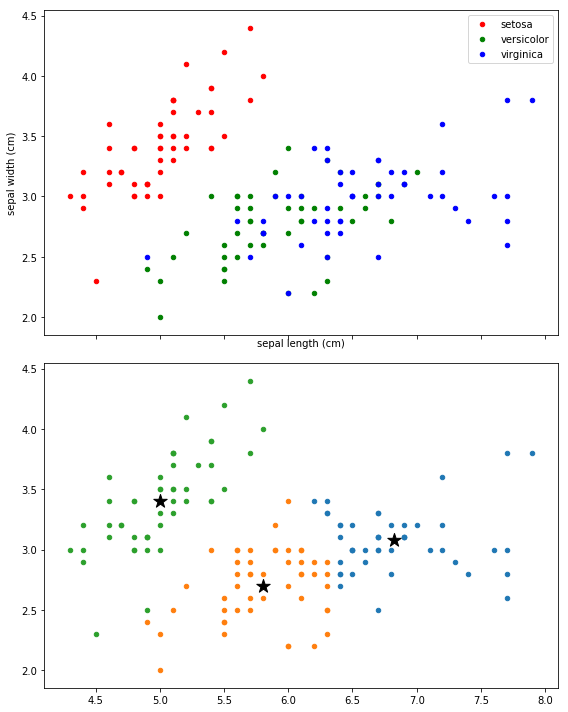

In [5]:
f1, f2 = 0, 1  # change for different features combination

fig, axes = plt.subplots(2, 1, figsize=(8, 10), sharex=True, sharey=True)

ax = axes[0]
for (ti, tname), color in zip(enumerate(iris.target_names), 'rgb'):
    rows = iris.data[iris.target == ti]
    ax.scatter(rows[:, f1], rows[:, f2], color=color, s=20, label=tname)
ax.set_xlabel(iris.feature_names[f1])
ax.set_ylabel(iris.feature_names[f2])
ax.legend()

ax = axes[1]
data = iris.data[:, (f1, f2)]
k = 3
asg, c = k_means(k, data)
for ci in range(k):
    ax.scatter(data[asg == ci, 0], data[asg == ci, 1], s=20)
ax.scatter(c[:, 0], c[:, 1], color='k', marker='*', s=200)

fig.tight_layout()

# 1

In [6]:
import copy

In [7]:
N = 5000

def gen_samples(p, mus, sigmas):
    samples, classes = [], []
    for _ in range(N):
        k = np.random.choice(K, p=p)
        s = np.random.multivariate_normal(mus[k], sigmas[k])
        samples.append(s)
        classes.append(k)
    return np.array(samples), np.array(classes)

In [8]:
def check_purity(classes, asg):
    k = len(set(classes))
    correct = 0
    for ci in range(k):
        cluster = classes[asg == ci]
        correct += max(np.sum(cluster == cl) for cl in range(k))
    return correct / len(asg)

In [9]:
def plot_groups(samples, asg, c):
    fig, ax = plt.subplots(figsize=(8, 8))
    for ci in range(K):
        ax.scatter(samples[asg == ci, 0], samples[asg == ci, 1], s=10)
    ax.scatter(c[:, 0], c[:, 1], color='k', marker='*', s=200)
    ax.set_aspect('equal')

0.976


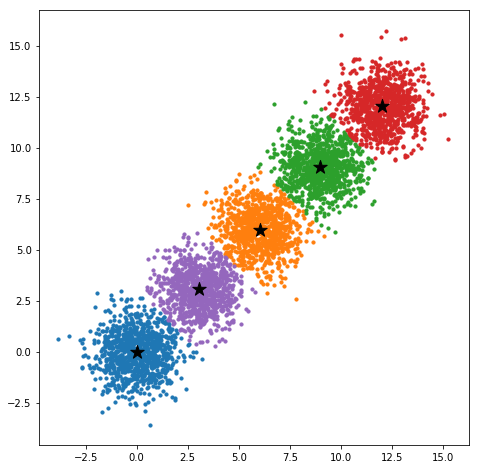

In [10]:
d, K = 2, 5

def get_a_kwargs():
    return {
        'p': 1/K * np.ones(K),
        'mus': [3*k * np.ones(d) for k in range(K)],
        'sigmas': [np.eye(d)] * K,
    }

samples, classes = gen_samples(**get_a_kwargs())
asg, c = k_means(K, samples)
print(check_purity(classes, asg))
plot_groups(samples, asg, c)

0.9562


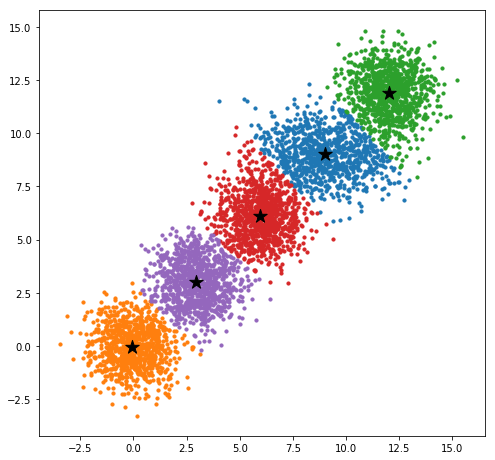

In [11]:
d, K = 2, 5
b_kwargs = get_a_kwargs()
b_kwargs['sigmas'][3] = np.array([[3, 0], [0, 1]])
samples, classes = gen_samples(**b_kwargs)
asg, c = k_means(K, samples)
print(check_purity(classes, asg))
plot_groups(samples, asg, c)

0.9156


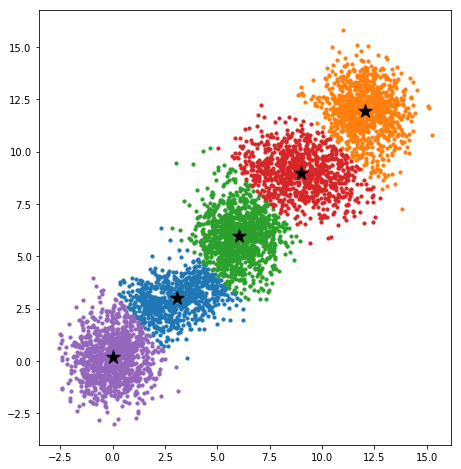

In [12]:
d, K = 2, 5
c_kwargs = copy.deepcopy(b_kwargs)
c_kwargs['sigmas'][1] = np.array([[3, 1], [1, 1]])
samples, classes = gen_samples(**c_kwargs)
asg, c = k_means(K, samples)
print(check_purity(classes, asg))
plot_groups(samples, asg, c)

0.9454


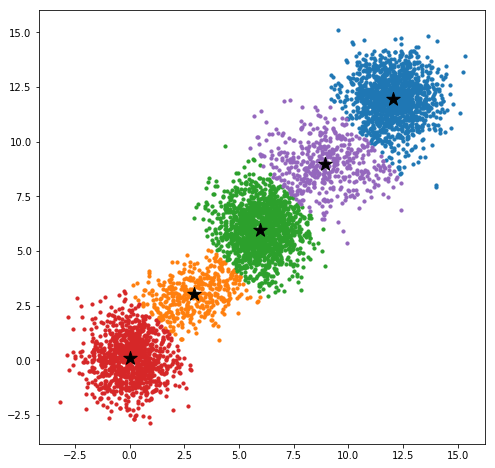

In [13]:
d, K = 2, 5
d_kwargs = copy.deepcopy(c_kwargs)
d_kwargs['p'] = [0.2, 0.1, 0.3, 0.1, 0.3]
samples, classes = gen_samples(**d_kwargs)
asg, c = k_means(K, samples)
print(check_purity(classes, asg))
plot_groups(samples, asg, c)

In [14]:
d, K = 3, 5
e_kwargs = get_a_kwargs()
e_kwargs['sigmas'][3] = np.array([[3, 1, 0], [1, 1, 0], [0, 0, 1]])
samples, classes = gen_samples(**e_kwargs)
asg, _ = k_means(K, samples)
check_purity(classes, asg)

0.9722

In [15]:
d, k = 100, 10
f_kwargs = get_a_kwargs()
samples, classes = gen_samples(**f_kwargs)
asg, _ = k_means(K, samples)
check_purity(classes, asg)

0.8048

# 2

In [16]:
# TODO

# 3

In [56]:
import itertools

def describe_and_group(dataset, f1=0, f2=1):
    if not hasattr(dataset, 'target_names'):
        dataset.target_names = [f'target{i}' for i in set(dataset.target)]
    k = len(dataset.target_names)
    asg, c = k_means(k, dataset.data)
    
    descr_len = 1000
    print(
        'DESCRIPTION',
        f'{dataset.DESCR[:descr_len]}... ({descr_len} chrs)',
        'FEATURES',
        ', '.join(dataset.feature_names),
        'TARGETS',
        ', '.join(dataset.target_names),
        'K_MEANS_PURITY',
        check_purity(dataset.target, asg),
        sep='\n\n'
    )
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True)
    ax = axes[0]
    for ti, tname in enumerate(dataset.target_names):
        samples = dataset.data[dataset.target == ti]
        ax.scatter(samples[:, f1], samples[:, f2], label=tname)
    ax.set_xlabel(dataset.feature_names[f1])
    ax.set_ylabel(dataset.feature_names[f2])
    ax.legend()

    ax = axes[1]
    for ci in range(k):
        ax.scatter(dataset.data[asg == ci, f1], dataset.data[asg == ci, f2])
    ax.scatter(c[:, f1], c[:, f2], marker='*', s=200, color='k')
    
    fig.tight_layout()

In [57]:
print('DATASETS\n', *[k[5:] for k in dir(datasets) if k.startswith('load_')], sep='\n')

DATASETS

boston
breast_cancer
diabetes
digits
files
iris
linnerud
mlcomp
sample_image
sample_images
svmlight_file
svmlight_files
wine


DESCRIPTION

Wine Data Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- 1) Alcohol
 		- 2) Malic acid
 		- 3) Ash
		- 4) Alcalinity of ash  
 		- 5) Magnesium
		- 6) Total phenols
 		- 7) Flavanoids
 		- 8) Nonflavanoid phenols
 		- 9) Proanthocyanins
		- 10)Color intensity
 		- 11)Hue
 		- 12)OD280/OD315 of diluted wines
 		- 13)Proline
        	- class:
                - class_0
                - class_1
                - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
  ... (100

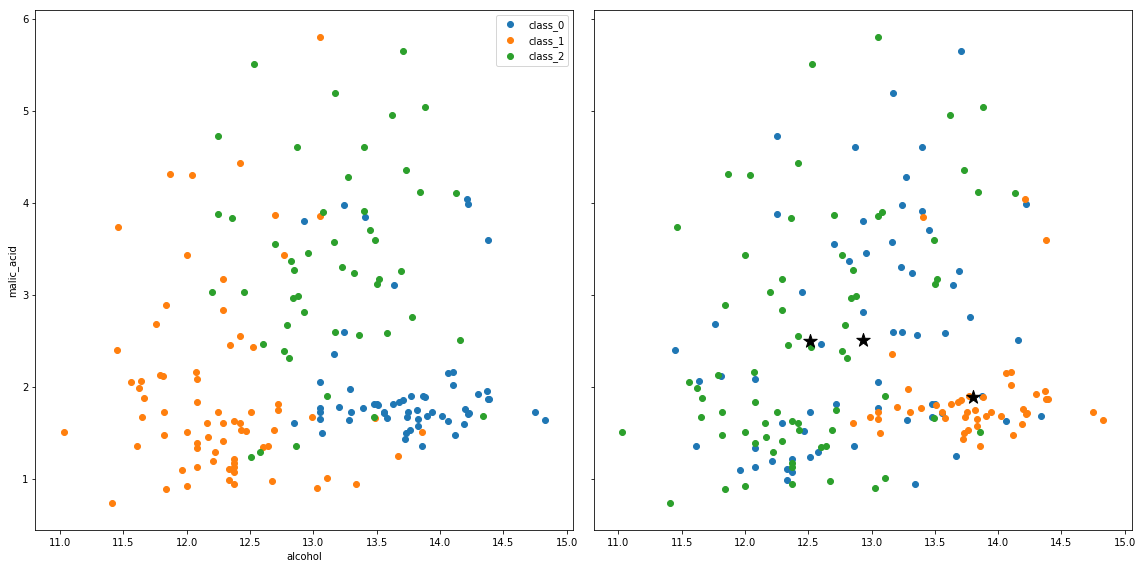

In [58]:
ds = datasets.load_wine()
describe_and_group(ds)

DESCRIPTION

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attr... (100

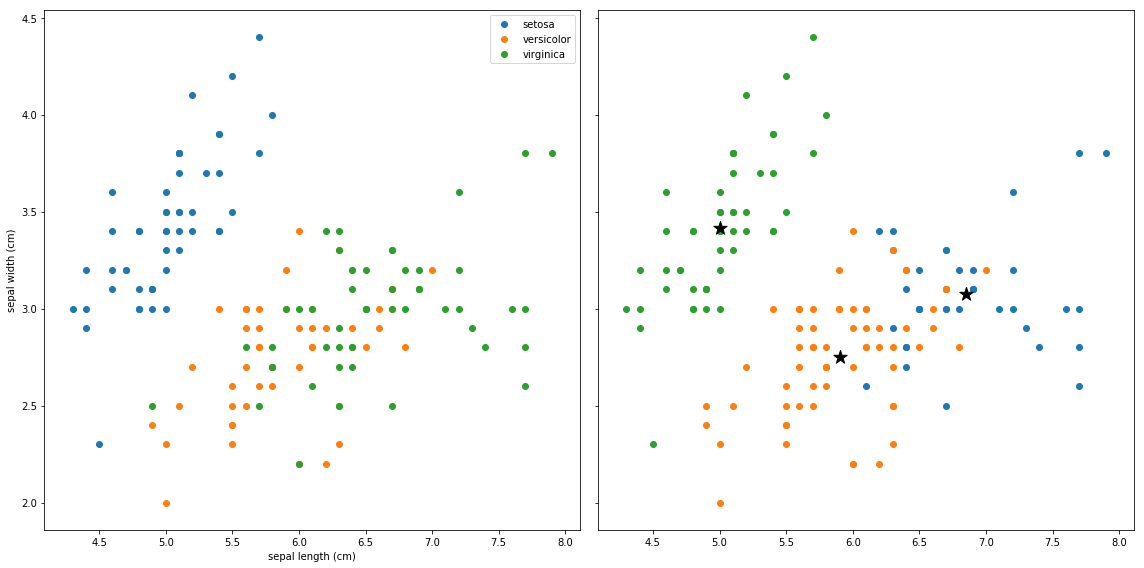

In [59]:
ds = datasets.load_iris()
describe_and_group(ds)

DESCRIPTION

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is ... (1000 chrs)

FEATURES

mean r

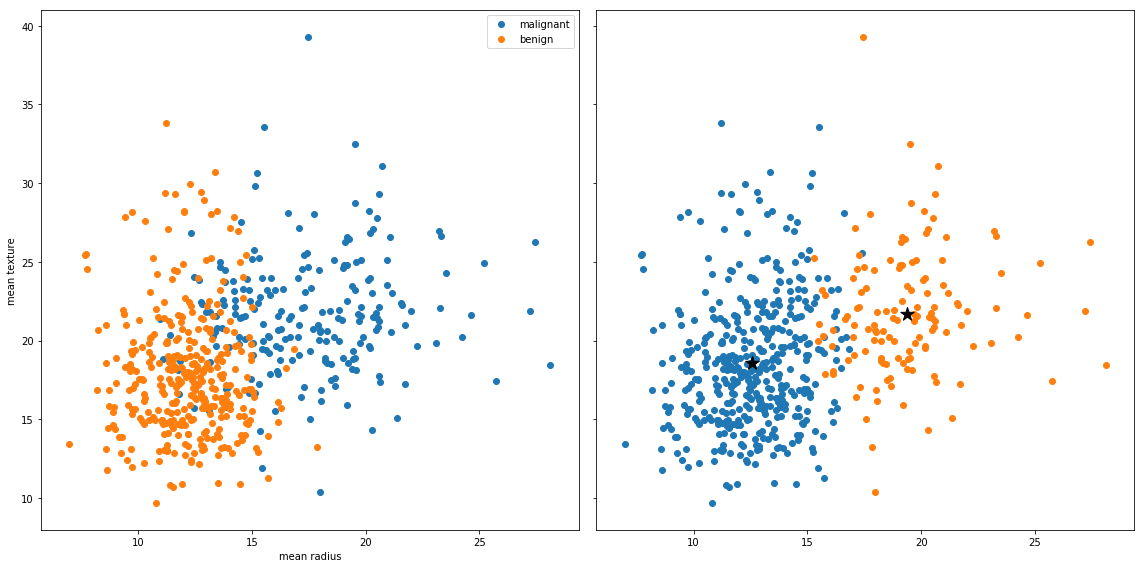

In [60]:
ds = datasets.load_breast_cancer()
describe_and_group(ds)

In [71]:
ds = datasets.load_digits()
print(dir(ds))
# describe_and_group(ds)

['DESCR', 'data', 'images', 'target', 'target_names']


# 4

In [18]:
import imageio

In [19]:
def reduce_colors(img, k):
    pixels = np.array(img, dtype=np.float32).reshape(-1, 3)
    asg, c = k_means(k, pixels)
    for ci in range(k):
        pixels[asg == ci] = c[ci]
    return np.array(pixels.reshape(img.shape), dtype=np.int32)

In [20]:
def show_2_imgs(img1, img2):
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    for ax, img in zip(axes, (img1, img2)):
        ax.axis('off')
        ax.imshow(img)
    fig.tight_layout()

In [21]:
def reduce_and_show(img_file, k):
    img = imageio.imread(f'assets/{img_file}')
    reduced = reduce_colors(img, k)
    show_2_imgs(img, reduced)

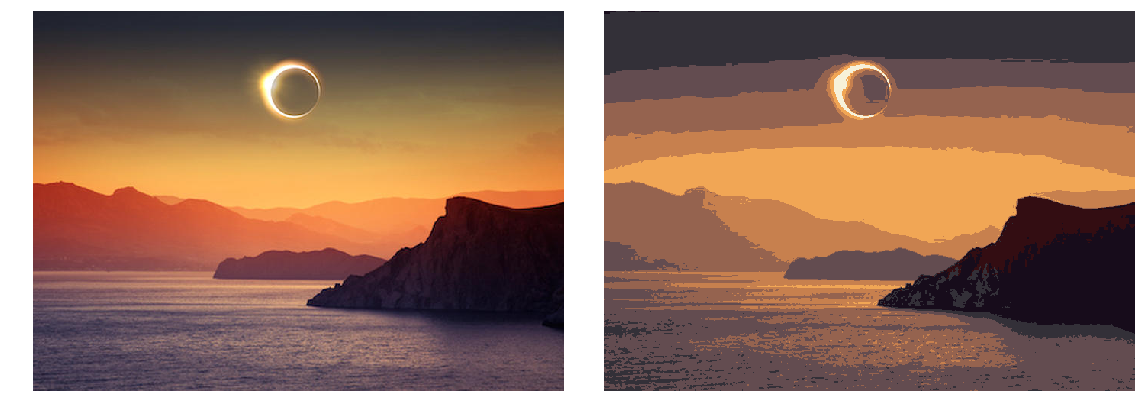

In [22]:
reduce_and_show('img1.jpg', 8)

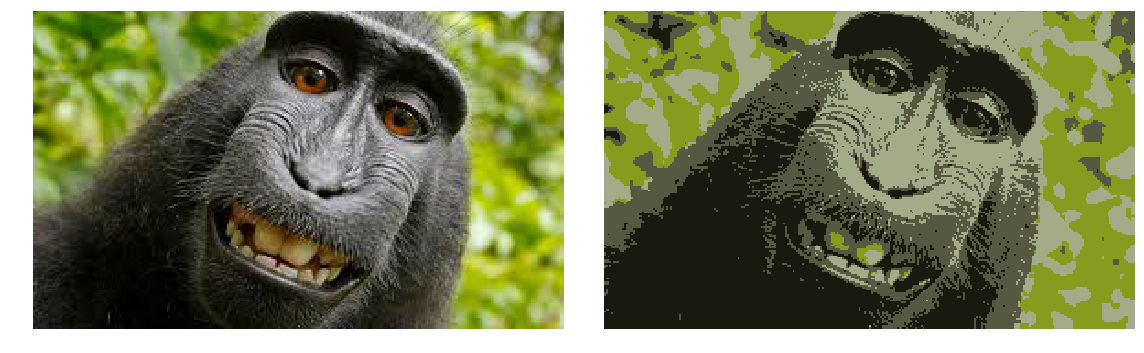

In [23]:
reduce_and_show('img2.jpg', 4)

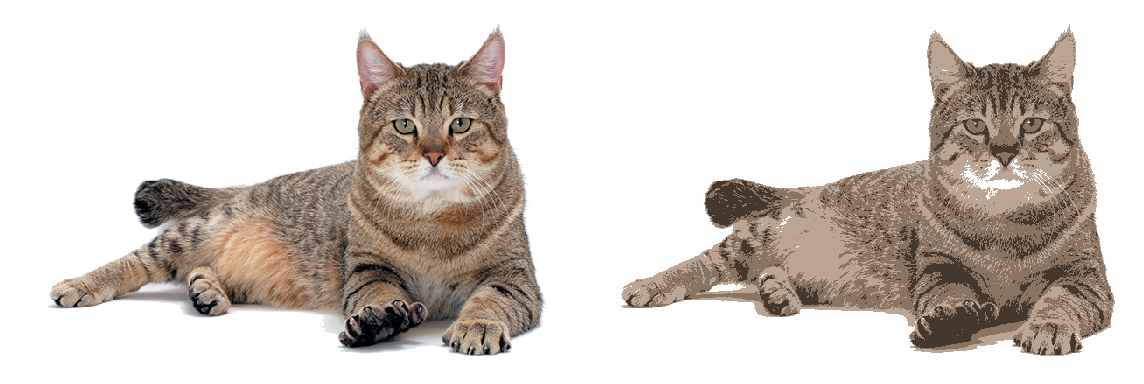

In [24]:
reduce_and_show('img3.jpg', 10)

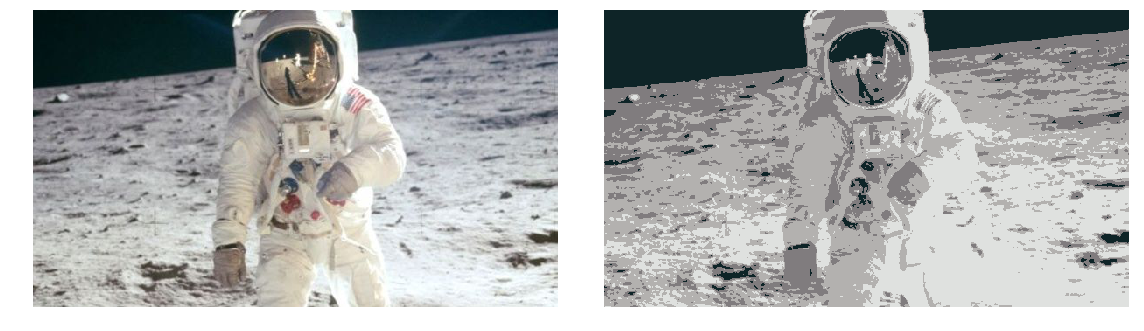

In [25]:
reduce_and_show('img4.jpg', 4)

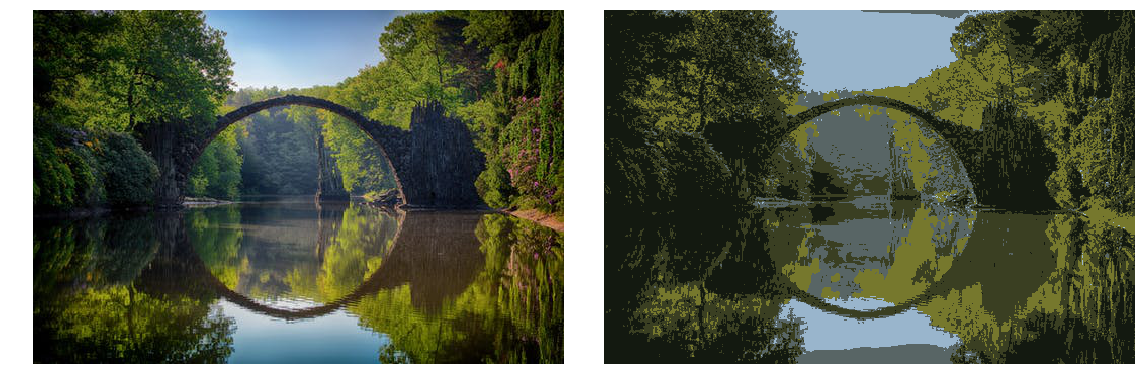

In [26]:
reduce_and_show('img5.jpg', 5)

# 5

In [6]:
with open('kosarak.dat') as f:
    txs_raw = f.readlines()
txs = []
prods = set()
for tx_raw in txs_raw:
    tx = [int(prod_raw) for prod_raw in tx_raw.split()]
    txs.append(tx)
    prods |= set(tx)
prods_count = len(prods)

In [7]:
frequencies = np.zeros(prods_count + 1)
for tx in txs:
    for prod in tx:
        frequencies[prod] += 1

In [72]:
def get_data(T=1000):
    most_popular = np.argsort(frequencies)[::-1][:T]
    mp_ind = {p: i for i, p in enumerate(most_popular)}
    data = np.zeros((prods_count + 1, T))
    for tx in txs:
        pop_in_tx = [mp_ind[prod] for prod in tx if prod in mp_ind]
        for prod in tx:
            data[prod, pop_in_tx] += 1
    # remove self-references
    for p, i in mp_ind.items():
        data[p, i] = 0
    return data

In [75]:
def group_and_plot(k, data, pop_count=10):
    asg, c = k_means(k, data)
    fig, axes = plt.subplots(pop_count, 1, figsize=(pop_count, 15))
    fig.suptitle(f'Products bought with {pop_count} most popular products')
    fig.tight_layout()
    for i in range(pop_count):
        ax = axes[i]
        ax.set_xscale('log')
        for g in range(k):
            rows = data[asg == g]
            ax.scatter(rows[:, i], np.zeros_like(rows[:, i]), marker='|', label=len(rows))
        ax.scatter(c[:, i], np.ones(k), marker='*', color='k')
        if i == 0:
            fig.legend()

In [ ]:
data_1000 = get_data(1000)

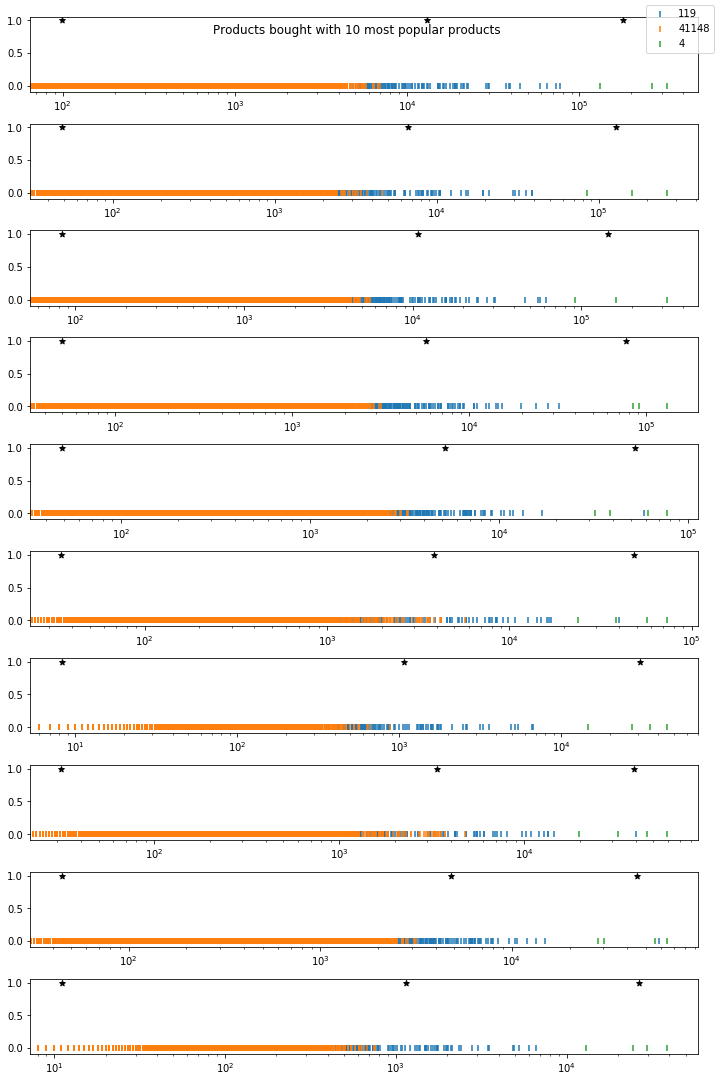

In [76]:
group_and_plot(3, data_1000)

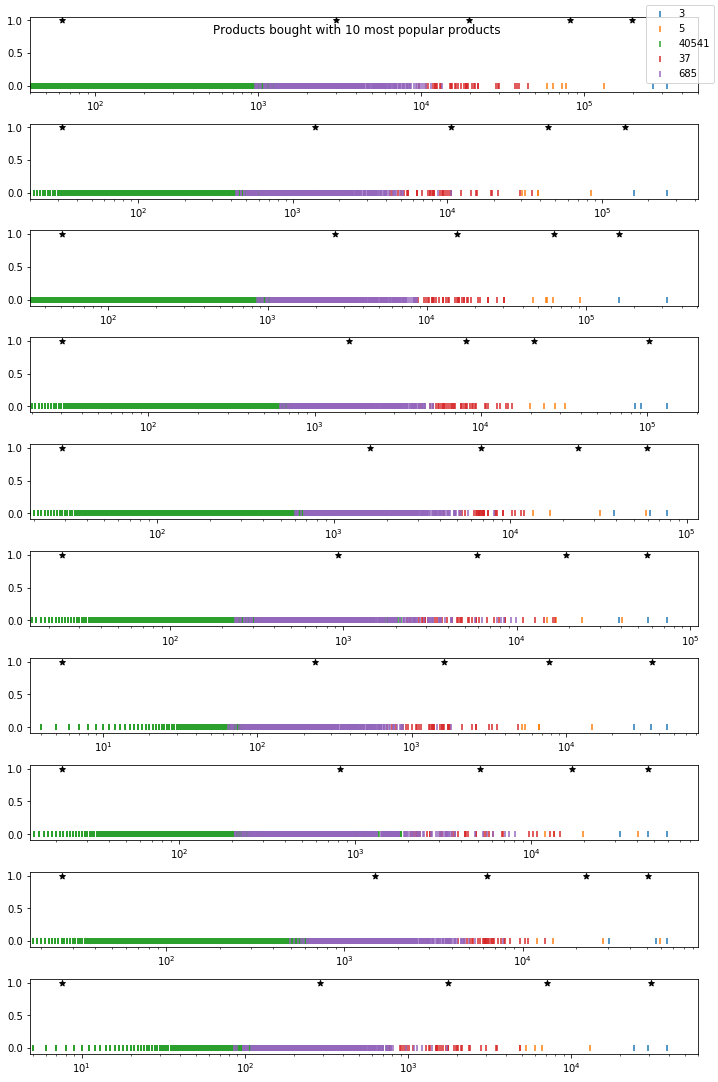

In [77]:
group_and_plot(5, data_1000)

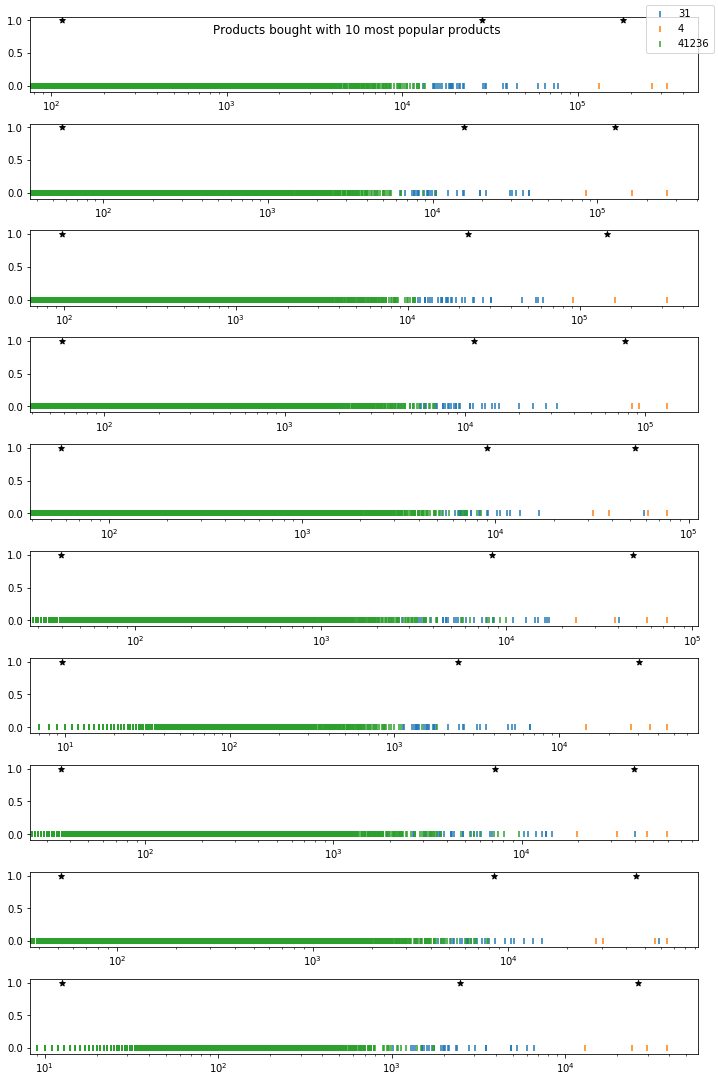

In [78]:
data_10 = get_data(10)
group_and_plot(3, data_10)